# **1 Google Colab**

## 1.1 Mounting your drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
drive_directory = '/content/drive/My Drive/studies/NLP/NLP_ex0'
os.chdir(drive_directory)


Mounted at /content/drive


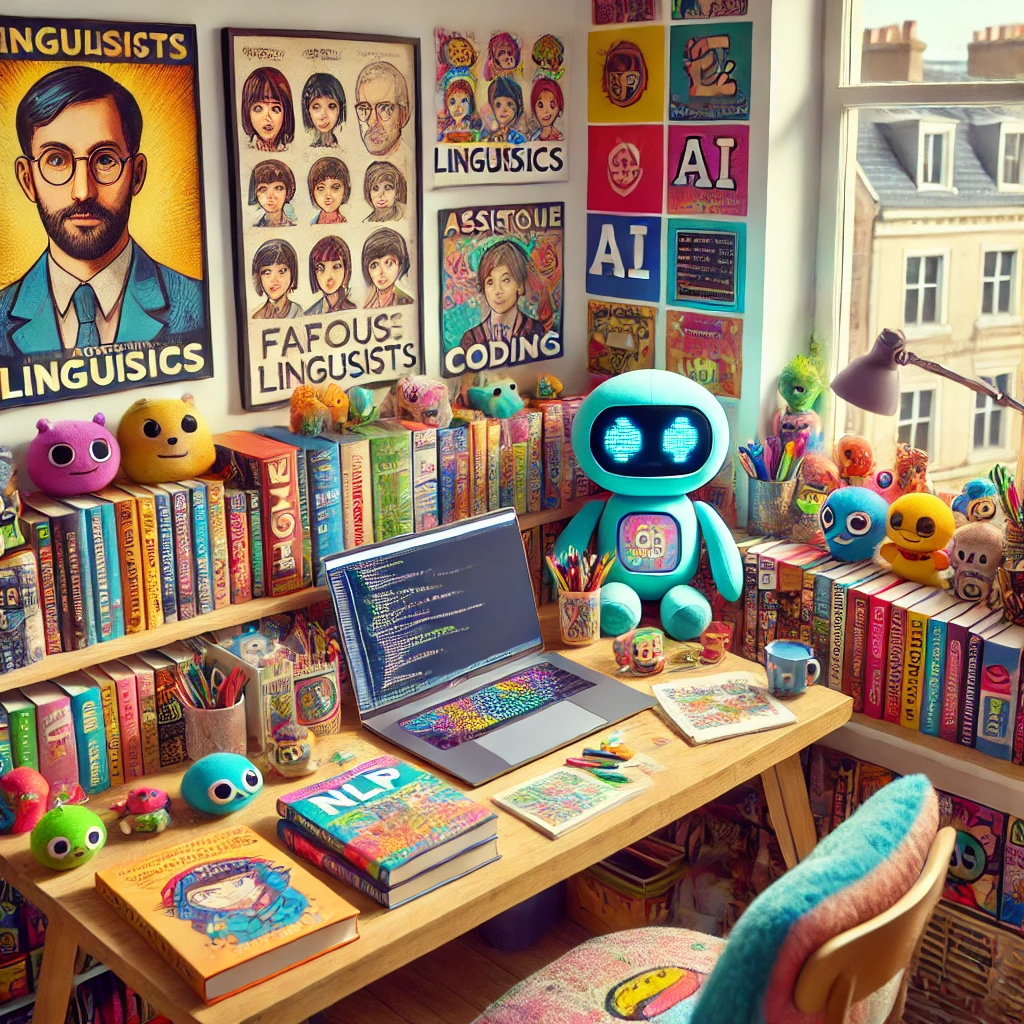

In [ ]:
from IPython.display import Image, display
display(Image('enjoying_nlp.png'))

## 1.2 Terminal commands and libraries download

In [6]:
 %cd /content/drive/My Drive/studies/NLP/NLP_ex0

/content/drive/My Drive/studies/NLP/NLP_ex0


In [7]:
!pip install transformers

In [8]:
!wget https://en.wikipedia.org/wiki/Smiley#/media/File:SmileyFace.png

--2024-11-06 12:14:40--  https://en.wikipedia.org/wiki/Smiley
Resolving en.wikipedia.org (en.wikipedia.org)... 208.80.153.224, 2620:0:860:ed1a::1
Connecting to en.wikipedia.org (en.wikipedia.org)|208.80.153.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289553 (283K) [text/html]
Saving to: ‘Smiley’

Smiley              100%[===================>] 282.77K  --.-KB/s    in 0.1s    

2024-11-06 12:14:41 (1.86 MB/s) - ‘Smiley’ saved [289553/289553]



# 2 Numpy + Torch

In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt

### 1. Plot the curve of the function y = 2x + 3 within the (0, 10) interval, using numpy.linspace. Try to use the minimal x samples that’s possible to accurately plot this function.

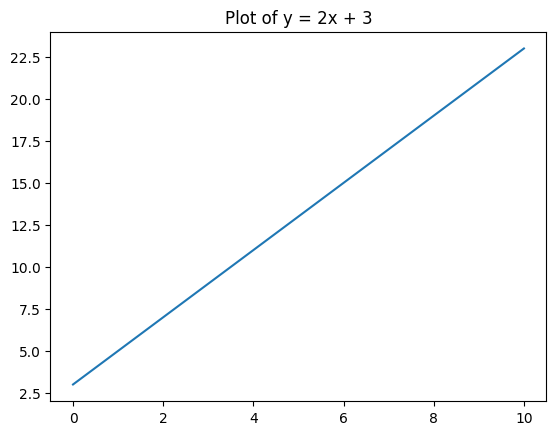

In [21]:
x = np.linspace(0, 10, 2)
y = 2 * x + 3
plt.plot(x,y)
plt.title("Plot of y = 2x + 3")
plt.show()

### 2. Plot the curve of the function y = x^2, again using numpy.linspace. Here you might need a larger amount of x axis samples.

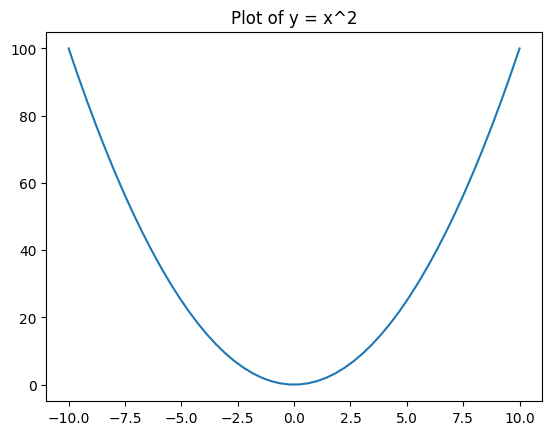

In [25]:
x = np.linspace(-10, 10)
y = x**2
plt.plot(x,y)
plt.title("Plot of y = x^2")
plt.show()

### 3. Plot 2 again, but this time add standard Gaussian noise to the samples. Namely, y = x2 + ε where ε ∼ N(0,1).



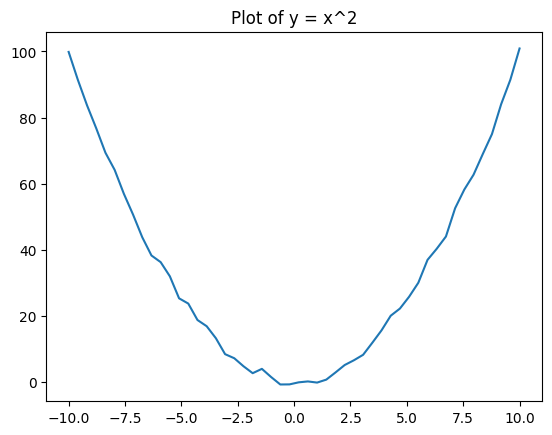

In [26]:
x = np.linspace(-10, 10)
e = np.random.normal(0, 1, len(x))
y = x**2 + e
plt.plot(x,y)
plt.title("Plot of y = x^2")
plt.show()

### 4. Randomly sample 100 real numbers from the interval [0, 1) uniformly (using numpy.random. Computes the empirical mean and variance and print these. (what would you expect that to be?).

Expected to be: mean\~0.5, variance~1/12

In [42]:
a = np.random.uniform(0, 1, 100)
print("The mean of the samples: " + str(np.mean(a)))
print("The variance of the samples: " + str(np.var(a)))

The mean of the samples: 0.5051763333833569
The variance of the samples: 0.08535591580831398


### 5. Print the indices of the 10 largest floats (within the original random array from previous subsection), using numpy.argpartition.

In [47]:
print(np.argpartition(a, -10)[-10:])

[53 73 10 78 79 30  7 18 24 35]


### 6. The sigmoid function σ : R → (0, 1) is given by
σ(x) ≜ 1 / (1 + exp(-x)) = exp(x) / (1 + exp(x)
### It is very important in machine learning as it maps any real number to the range (0, 1) and is thus often used to induce a probability distribution. On a single figure, plot both σ(x) and σ(−x) in the range of [−10,10].

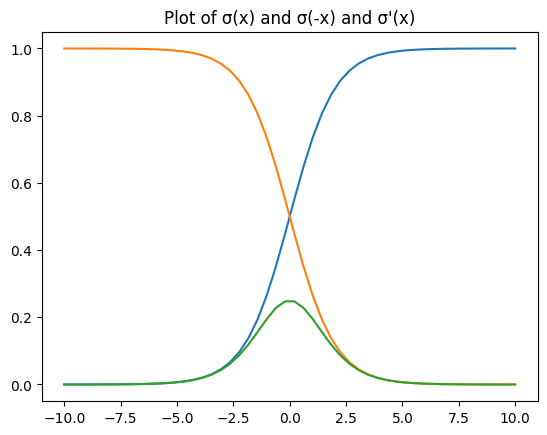

In [51]:
x = torch.from_numpy(np.linspace(-10, 10))
pos_sigmoid = torch.sigmoid(x)
neg_sigmoid = torch.sigmoid(-x)
der_sigmoid = torch.sigmoid(x) * (1 - torch.sigmoid(x))
plt.plot(x,pos_sigmoid)
plt.plot(x,neg_sigmoid)
plt.plot(x,der_sigmoid)
plt.title("Plot of σ(x) and σ(-x) and σ'(x)")
plt.show()

### What is the relation between σ(−x) and σ(x)? What is the derivative of the sigmoid with respect to x? Answer in a comment in the cell (you can use f(x) instead of σ(x) for convenience) and add to the same plot the derivative of σ(x) in the same x-range.

relation between σ(−x) and σ(x): σ(−x) = 1 - σ(x)

derivative of σ(x):

exp(x)/(1+exp(x))dx = (exp(x)dx*(1+exp(x) - exp(x)*(1+exp(x))dx) / (1 + exp(x))**2

= (exp(x)(1+exp(x)) - exp(x)(exp(x))/(1 + exp(x))**2

=exp(x)/(1 + exp(x))**2

=(exp(x)*(exp(x)+1-exp(x))/(1 + exp(x))**2

= σ(x) * (1 / (1 + exp(x)))

*1 - σ(x) = 1 - (1 / (1 + exp(-x)))
            = (1 + exp(-x) - 1) / (1 + exp(-x))
            = exp(-x) / (1 + exp(-x))
            = 1 / (1 + exp(x))

= σ (x) * (1 - σ(x))

### Now let’s move to mess around a bit with the GPU. Import torch, then check whether the GPU is visible to you. Here you can use torch.cuda.is availiable().



In [1]:
import torch
torch.cuda.is_available()

False

### If not, make it happen. Google Colab offers a free GPU (and also some paid upgraded ones) to every user. (help: go to Runtime → Change runtime type)

In [2]:
import torch
torch.cuda.is_available()

True

### Now, create a random 3-dimensional tensor using torch.rand, and print its current device using the .device function. Now, move it to the GPU. Here you may use the .to(′cuda′) method of torch tensors. Now print its device again to verify it has indeed been moved to the GPU.

In [3]:
x = torch.rand([2,3,2])
print(x.device)
x = x.to('cuda')
print(x.device)

cpu
cuda:0
